결정트리(decision tree)

Classifier

In [22]:
#복잡도 제어하기 
# - 사전가지치기(깊이 or 리프 or 분할포인트 개수 제한) DecisionTreeRegressor / DecisionTreeClassifier
# - 사후가지치기 ccp_alpha(매개변수)
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import mglearn
%matplotlib inline
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=42,stratify=cancer.target)
tree=DecisionTreeClassifier(random_state=0).fit(X_train,y_train) #treeclassifier에서 random_state가 필요한 이유 : each node에서 spliter가 'best'라 해도 실행때마다 최적의 분할이 달라질 수 있으므로 seed를 제공하기 위함
print('훈련 세트 점수 : {:.2f}'.format(tree.score(X_train,y_train)))
print('테스트 세트 점수 : {:.2f}'.format(tree.score(X_test,y_test)))
#가지치기 안해줘서 리프노드가 모두 순수노드 -> 과대적합

훈련 세트 점수 : 1.00
테스트 세트 점수 : 0.94


In [23]:
tree=DecisionTreeClassifier(random_state=0,max_depth=4).fit(X_train,y_train) #연속된 질문 4개로 제한
print('훈련 세트 점수 : {:.2f}'.format(tree.score(X_train,y_train)))
print('테스트 세트 점수 : {:.2f}'.format(tree.score(X_test,y_test)))

훈련 세트 점수 : 0.99
테스트 세트 점수 : 0.95


In [24]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['negative','positive'],feature_names=cancer.feature_names,impurity=False,filled=True)

In [25]:
#graphviz 오류 해결하기
import graphviz
with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

[Text(480.04411764705884, 391.392, 'worst radius <= 16.795\nsamples = 426\nvalue = [159, 267]\nclass = positive'),
 Text(270.79411764705884, 304.416, 'worst concave points <= 0.136\nsamples = 284\nvalue = [25, 259]\nclass = positive'),
 Text(147.70588235294116, 217.44, 'radius error <= 1.048\nsamples = 252\nvalue = [4, 248]\nclass = positive'),
 Text(98.47058823529412, 130.464, 'smoothness error <= 0.003\nsamples = 251\nvalue = [3, 248]\nclass = positive'),
 Text(49.23529411764706, 43.488, 'samples = 4\nvalue = [1, 3]\nclass = positive'),
 Text(147.70588235294116, 43.488, 'samples = 247\nvalue = [2, 245]\nclass = positive'),
 Text(196.94117647058823, 130.464, 'samples = 1\nvalue = [1, 0]\nclass = negative'),
 Text(393.88235294117646, 217.44, 'worst texture <= 25.62\nsamples = 32\nvalue = [21, 11]\nclass = negative'),
 Text(295.4117647058823, 130.464, 'worst smoothness <= 0.179\nsamples = 12\nvalue = [3, 9]\nclass = positive'),
 Text(246.1764705882353, 43.488, 'samples = 10\nvalue = [1,

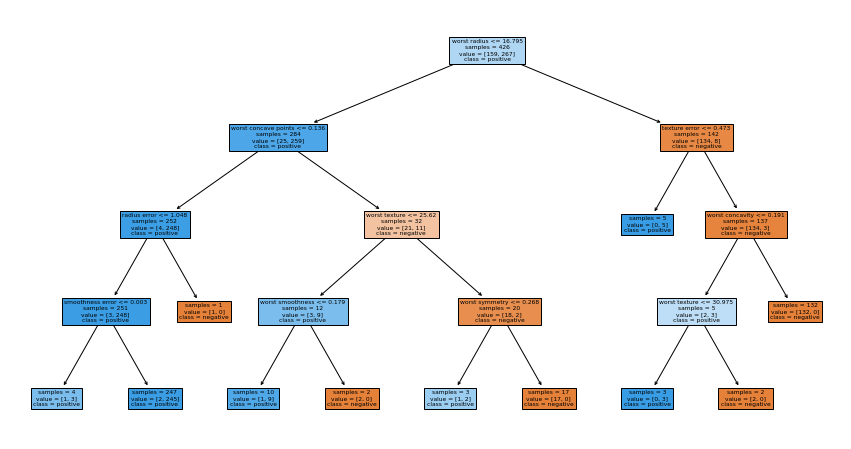

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,8))
plot_tree(tree,class_names=['negative','positive'],feature_names=cancer.feature_names,impurity=False,filled=True) #impurity(불순도) -> gini 0~1(집합 내 비율) 

In [27]:
print('특성 중요도(feature_importance) : \n',tree.feature_importances_.round(3))

특성 중요도(feature_importance) : 
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


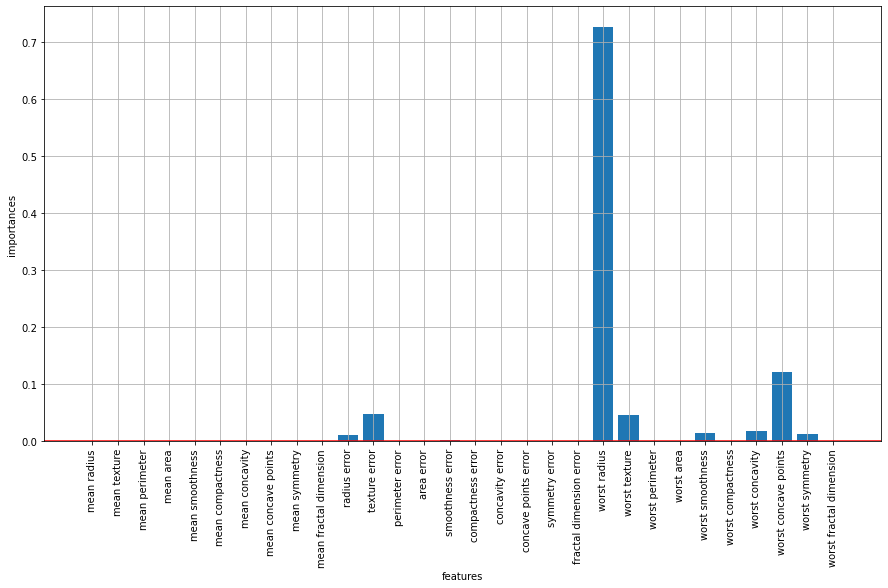

In [28]:
plt.figure(figsize=(15,8))
plt.bar(cancer.feature_names,tree.feature_importances_)
xlim=plt.xlim()
plt.hlines(0,xlim[0],xlim[1],color='red')
plt.xlim(xlim)
plt.xticks(rotation=90)
plt.xlabel('features')
plt.ylabel('importances')
plt.grid('True')

(-1.0, 30.0)

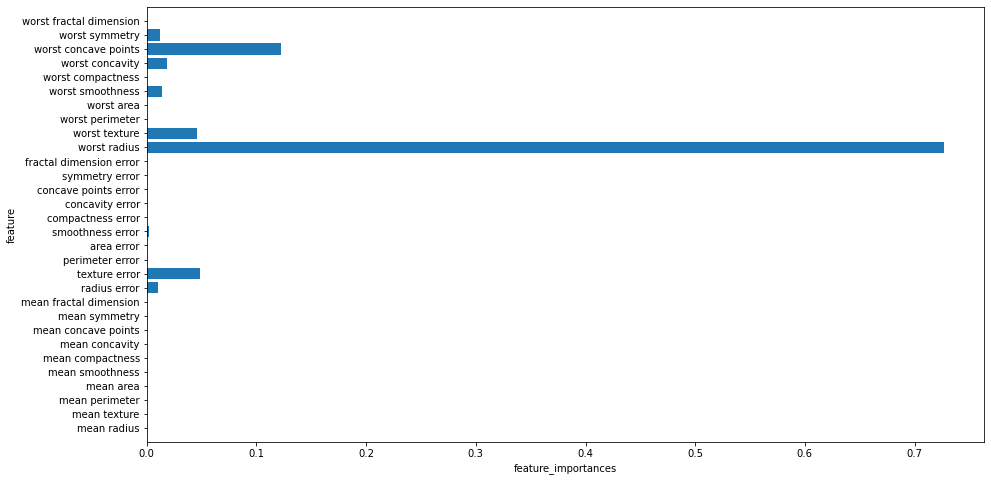

In [29]:
plt.figure(figsize=(15,8))
n_features=cancer.data.shape[1]
plt.barh(np.arange(n_features),tree.feature_importances_,align='center') #align default ='center'/ 'edge'-> 눈금 끝에 붙어서 그려짐
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('feature_importances')
plt.ylabel('feature')
plt.ylim(-1,n_features) #-1인 이유 : 첫번째 특성인 mean radius가 맨 바닥이 있지 않게 하기 위해

특성중요도는 coef와 달리 항상 양수이고 어떤 클래스를 지지 하는지 알 수 없어
특성과 클래스 사이 관계는 단순하지 않을 수 있다

Regression (트리 기반 회귀는 '외삽(extrapolation)' 고려해야해 -> 훈련데이터 범위 밖의 데이터 포인트에 대해 예측 불가능

In [30]:
mglearn.datasets.DATA_PATH

'C:\\Users\\sewoong\\anaconda3\\lib\\site-packages\\mglearn\\data'

     Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
..          ...      ...           ...
328         328  2015.58  4.500000e-03
329         329  2015.67  4.300000e-03
330         330  2015.75  4.200000e-03
331         331  2015.83  3.800000e-03
332         332  2015.92  3.700000e-03

[333 rows x 3 columns]


Text(0, 0.5, 'price($/Mbyte)')

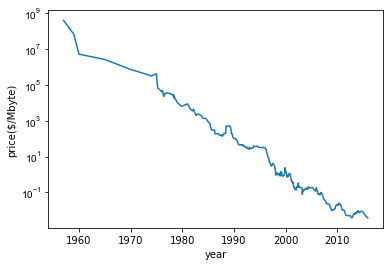

In [31]:
import os
import pandas as pd
ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))
print(ram_prices)
plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date,ram_prices.price) #draw with log scale
plt.xlabel('year')
plt.ylabel('price($/Mbyte)')

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]

X_train=data_train.date.to_numpy()[:,np.newaxis] #date Series를 numpy로.. data_train.date.values.reshape(-1,1) 과 같다 .. np.newaxis -> 고차원으로 만들어줌 그냥 to_numpy()하면 1차원인데 2차원으로 바꾼것
y_train=np.log(data_train.price) #log scale with e(자연상수)

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

X_all=ram_prices.date.to_numpy()[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr) #np.exp() : 밑이 e인 지수함수(e^x)로 변환

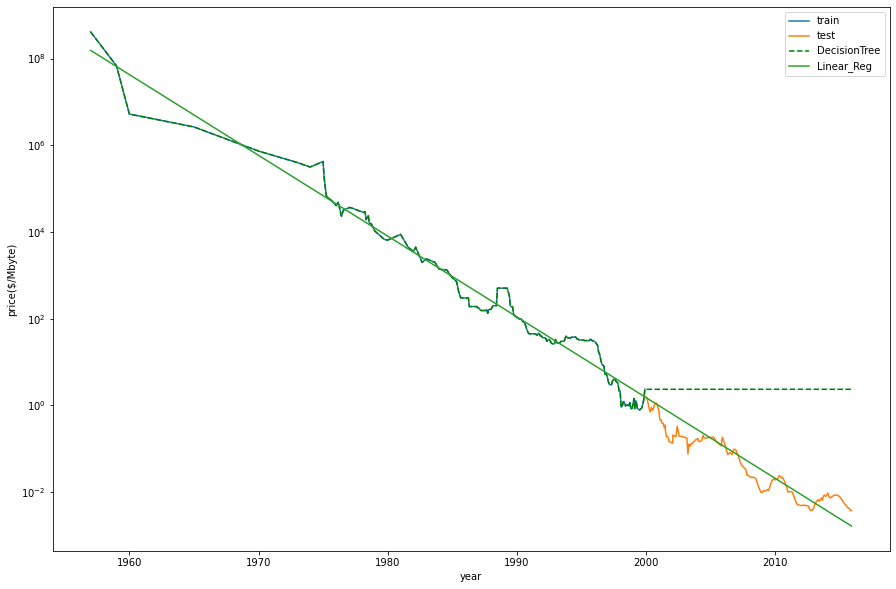

In [33]:
plt.figure(figsize=(15,10))
plt.xlabel('year')
plt.ylabel('price($/Mbyte)')
plt.semilogy(data_train.date,data_train.price,label='train') #2000년대 이전 훈련 데이터
plt.semilogy(data_test.date,data_test.price,label='test') #2000년대 이후 테스트 데이터
plt.semilogy(ram_prices.date,price_tree,'g--',label='DecisionTree') #tree
plt.semilogy(ram_prices.date,price_lr,label='Linear_Reg') #LinearReg
plt.legend(loc='best')

<tree, Linear_Reg 모두 전체 기간으로 예측>


-> tree max_depth 지정 안해서 괴적합으로 train 그래프와 일치

-> tree(DecisionTreeRegressor)는 훈련데이터 벗어나는(test) 데이터 예측 불가 >>시계열 데이터에 적합X

->Linear_regreesion이므로 직선으로 그래프 도출

<DecisionTree 과적합 방지 대표적 parameter>

->max_depth : 트리 최대 깊이
 
->min_sample_leaf : 리프 노드가 되기 위한 최소 샘플 개수

->max_leaf_nodes : 리프 노드의 최대 개수

->min_sample_split 분할 하기 위한 최소 샘플 개수

Ensemble(connect several ML model) -> Random Forest, Gradient Boosting

※Random Forest 

-> 과적합 방지(과적합 트리 여러개 만들어서 결과 평균냄)
              
-> 트리생성(n_estimators개수 지정):데이터 포인트 무작위 선택(부트스트랩샘플) and 분할테스트에서 특성 무작위선택(max_features:후보특성몇개)
            (default=10)클수록 좋아
            
-> 데이터 스케일 맞출필요 X (독립적이니까)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
print('attr : ',X.shape[1])
print('y : ',np.unique(y,return_counts=True))
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)
forest=RandomForestClassifier(n_estimators=5,random_state=2) #생성된 트리 : estimators_ 에 저장)
forest.fit(X_train,y_train)
forest.estimators_

attr :  2
y :  (array([0, 1], dtype=int64), array([50, 50], dtype=int64))


[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710)]

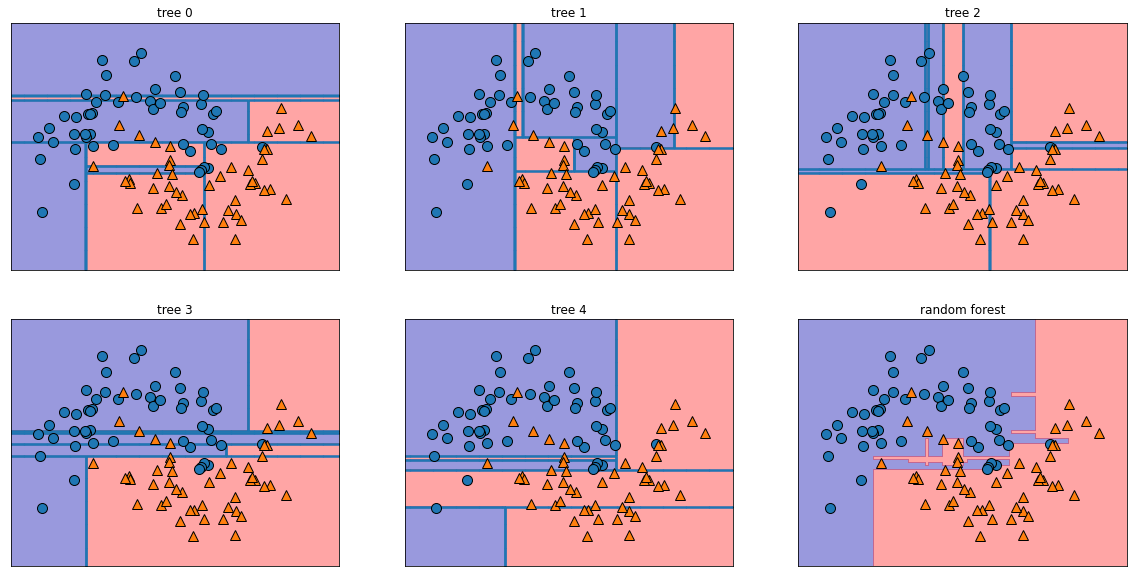

In [35]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i ,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)): #enumerate: index와 같이 나와 #zip하려면 1차원
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('random forest')
mglearn.discrete_scatter(X[:,0],X[:,1],y)

모두 다른 트리임을 확인

In [36]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)
print('훈련 세트 정확도 : {:.3f}'.format(forest.score(X_train,y_train))) #데이터 누락 때문에 1이 안나올 수 있음
print('테스트 세트 정확도 : {:.3f}'.format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.998
테스트 세트 정확도 : 0.944


Text(0.5, 0, 'feature_importances')

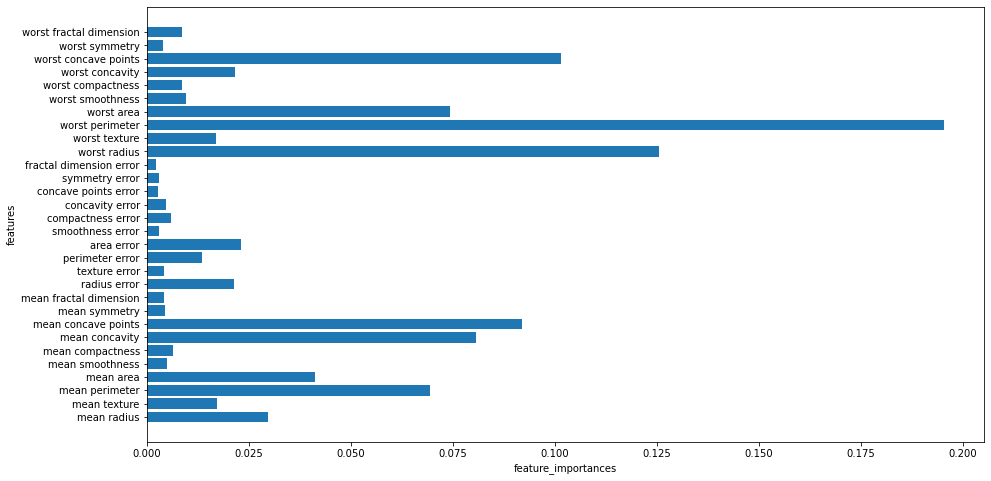

In [37]:
plt.figure(figsize=(15,8))
plt.barh(np.arange(len(cancer.feature_names)),forest.feature_importances_,align='center')
plt.yticks(np.arange(len(cancer.feature_names)),cancer.feature_names)
plt.ylabel('features')
plt.xlabel('feature_importances')

max_features -> Classifier : sqrt(n_features)    Regressor : n_features

※Gradient Boosting Regression Tree (Classifier, Regressor both available)

-> make tree with supplementing previous tree error ->learning_rate:(복잡도와 비례(n_estimators도 복잡도와 비례))
                         
                                                                                 너무 크면 과적합 위험


-> strong 가지치기 (no random) ->low depth ->low memory,time : weak learner

-> 특성 스케일 조정 X

-> validation_fraction, n_iter_no_change : 훈련데이터중 v_f 비율만큼 검증데이터 만들어서 성능 검사(n_iter만큼 반복동안 향상 없으면 종료)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)
gbrt=GradientBoostingClassifier(max_depth=3,n_estimators=100,learning_rate=0.1) #parameter default value 
gbrt.fit(X_train,y_train)
print('훈련 세트 정확도 : {:.3f}'.format(gbrt.score(X_train,y_train))) #과적합 -> learning_rate or max_depth 낮추기
print('테스트 세트 정확도 : {:.3f}'.format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.951


In [39]:
gbrt=GradientBoostingClassifier(max_depth=1,random_state=0)
gbrt.fit(X_train,y_train)
print('훈련 세트 정확도 : {:.3f}'.format(gbrt.score(X_train,y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 0.995
테스트 세트 정확도 : 0.965


In [55]:
condlist=[gbrt.decision_function(X_test)>0,gbrt.decision_function(X_test)<0] #decision_function : 결정 함수 (목적 함수)
values=[1,0]
re=np.select(condlist,values,default=5)
uni,cnt=np.unique((re==y_test),return_counts=True)
cnt[1]/(cnt[0]+cnt[1])

0.965034965034965

In [40]:
gbrt=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbrt.fit(X_train,y_train)
print('훈련 세트 정확도 : {:.3f}'.format(gbrt.score(X_train,y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(gbrt.score(X_test,y_test)))

훈련 세트 정확도 : 0.995
테스트 세트 정확도 : 0.944


Text(0, 0.5, 'features')

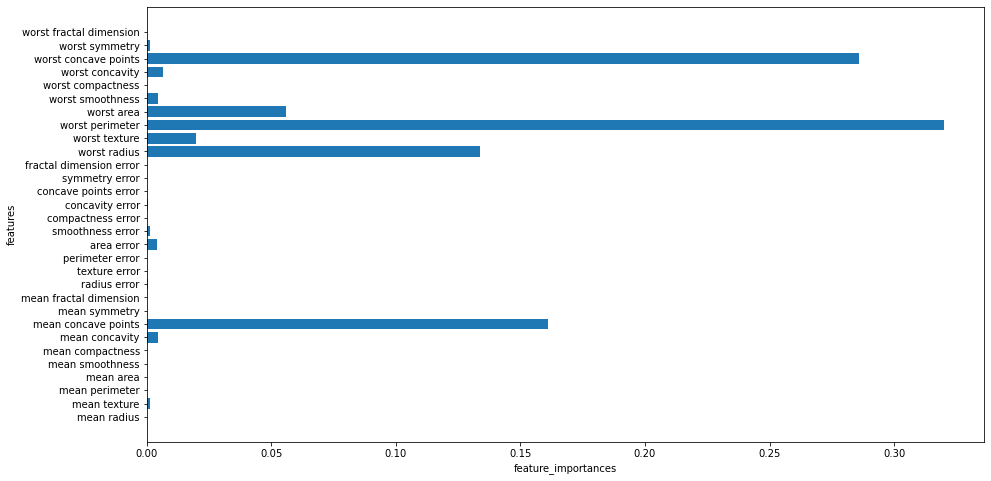

In [41]:
gbrt=GradientBoostingClassifier(max_depth=1,random_state=0)
gbrt.fit(X_train,y_train)
plt.figure(figsize=(15,8))
plt.barh(np.arange(len(cancer.feature_names)),gbrt.feature_importances_,align='center')
plt.yticks(np.arange(len(cancer.feature_names)),cancer.feature_names)
plt.xlabel('feature_importances')
plt.ylabel('features')

xgboost : 대용량 분산 처리 위한 그레이디언트 부스팅 오픈 소스 라이브러리

LightGBM : 히스토그램 기반 부스팅 알고리즘

sklearn -> HistGradientBoosting(Classifer or Regressor) 클래스